In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from utils import get_unicode, process_unicode
from data import get_train_data, get_test_data

seed = 1

# First look

In [2]:
workspace_path = os.getcwd()
train_csv_path = os.path.join(workspace_path, 'train_submission.csv')
test_csv_path = os.path.join(workspace_path, 'test_without_labels.csv')

In [3]:
train_df, *_ = get_train_data(val_size=0, random_state=seed)
test_df = get_test_data()

In [4]:
train_df.head()

,ID,Usage,Text,Label,Idx
0,136,Public,Finalment Atena le recibe en l'acropoli d'Ate...,arg,0
1,62,Public,Jane Laffort fille de Joseph Laffort et d' Ang...,lat,1
2,74,Public,Сонзэ ялаксонзо - Роджер Джозеф Бошкович - у...,myv,2
3,40,Public,Mɛniɛ nkùɔ dìì mɔ̀nnì bɛnìtìbɛ̀ kɛ́deè kɛ̀ Nɔ...,tbz,3
4,30,Public,Ka go dirisa thekniki yeo ya phetogonepiso Le...,tsn,4


In [5]:
test_df.head()

,Usage,Text
0,Private,Hüttwilen el xe on comune del Canton Turgovia ...
1,Private,La leĝo zorgas pri kompenso de nur la plej gra...
2,Private,پک اپ پر اپنے ڈرائیور سے پہلے پہنچیں
3,Private,Mukmu Ch'itana mukmu icha Butun nisqaqa nisqa...
4,Private,Iwe lon ena fansoun lupwen ra aleani än Mo...


In [6]:
# get the number of lines in the train and test data
train_num = len(train_df)
test_num = len(test_df)
print('train_num:', train_num)
print('test_num:', test_num)

train_num: 38854
test_num: 190567


In [7]:

print(train_df.columns)

Index(['ID', 'Usage', 'Text', 'Label', 'Idx'], dtype='object')


# IDs ??

<Axes: >

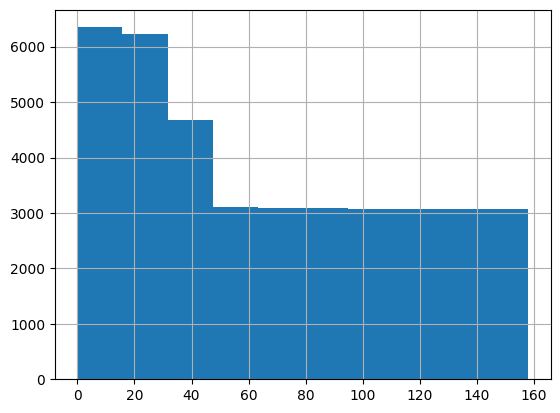

In [8]:
# plot the histograms of the ID column in train
train_df['ID'].hist()

In [9]:
# for train, create a dataframe containing ID, number of words and number of characters
train_df['num_words'] = train_df['Text'].apply(lambda x: len(x.split()))
train_df['num_chars'] = train_df['Text'].apply(lambda x: len(x))
train_df[['ID', 'num_words', 'num_chars']].head()


,ID,num_words,num_chars
0,136,24,154
1,62,31,193
2,74,57,451
3,40,15,104
4,30,12,71


In [10]:
# remove the two counts
train_df = train_df[["ID", "Usage", "Text", "Label"]]

# Alphabet

In [11]:

# Assuming train_df is your DataFrame
label_counts = train_df['Label'].value_counts()

# Create a DataFrame to store label counts and examples
label_summary = pd.DataFrame({
    'Label': label_counts.index,                  # Labels
    'Count': label_counts.values,                # Corresponding counts
    'Example': [train_df[train_df['Label'] == label].iloc[0]['Text'] for label in label_counts.index]  # Extract only the 'Text' field
})

# Display the summary
print(label_summary)

    Label  Count                                            Example
0     tgk    300  «Пойтахт» бизнес маркази бизнес-музокаралар  к...
1     kur    200  Piştî heyşt mehan  di civîna xwe ya sisiyan de...
2     crh    200  Сен дюньядан Манъа берген адамларгъа Сенинъ Ад...
3     tat    200  Tatar İrekle Entsiklopediäse - Wikipediädä kir...
4     bak    200  Һырттың атамаһы Ҡырым татарҙары теленән турана...
..    ...    ...                                                ...
384   pau      2  A Burj Khalifa a kot el metongakl el blai ra b...
385   gcr      1  Jul  (/dʒuːl/ (Djoul))  li k'aplé réèlman Juli...
386   gaa      1               Mɛni hewɔ ni oyaaa nitsumɔ ŋmɛnɛ lɛ?
387   kua      1  Eendombwedi daJehowa  odi dili moilongo 236 (6...
388   toi      1             Sena wasika ciindi nzi kung'anda yako?

[389 rows x 3 columns]


In [12]:

print(label_counts)

Label
tgk    300
kur    200
crh    200
tat    200
bak    200
      ... 
pau      2
gcr      1
gaa      1
kua      1
toi      1
Name: count, Length: 389, dtype: int64


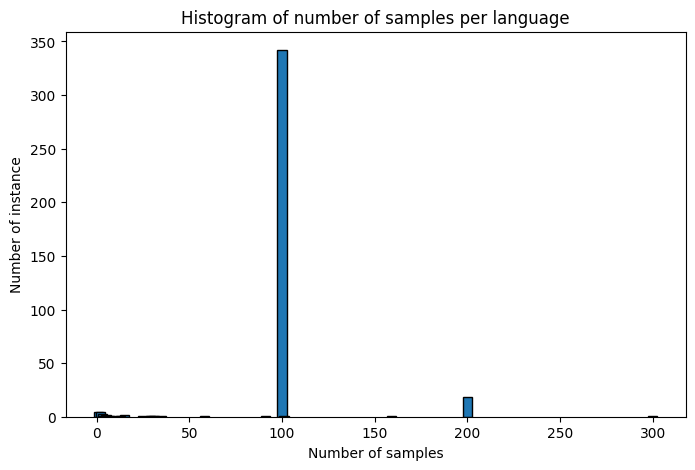

In [36]:
# Get frequency of each unique count
count_frequencies = label_counts.value_counts()

# Plot histogram-like bar chart
plt.figure(figsize=(8, 5))
plt.bar(count_frequencies.index, count_frequencies.values, width=5, edgecolor='black')

# Labels
plt.xlabel('Number of samples')
plt.ylabel('Number of instance')
plt.title('Histogram of number of samples per language')

plt.show()

In [35]:
all_unicodes, language_unicodes = process_unicode(train_df, get_unicode)


In [36]:
print("All Unicode length:")
print(len(all_unicodes))

print("\nNumber of languages:") #key = language, value = set of all unicodes seen in that language
print(len(language_unicodes))

All Unicode length:
6462

Number of languages:
390


# Inconsistency : NaN + 389 Labels

In [37]:
distinct_labels = train_df['Label'].unique()

print(len(distinct_labels))

390


In [38]:
print(list(label_counts.index))


['tgk', 'kur', 'crh', 'tat', 'bak', 'gom', 'kat', 'srp', 'hin', 'tuk', 'hau', 'hbs', 'guj', 'mon', 'kaa', 'uig', 'aze', 'uzb', 'som', 'san', 'rmy', 'jbo', 'afr', 'ekk', 'szl', 'mam', 'chv', 'dtp', 'sah', 'diq', 'cab', 'ell', 'luo', 'apc', 'frr', 'nnb', 'ixl', 'naq', 'hmn', 'pes', 'bqc', 'tyv', 'djk', 'kab', 'swa', 'ace', 'vls', 'mgh', 'pcd', 'wal', 'kon', 'new', 'arg', 'nbl', 'yap', 'aym', 'epo', 'umb', 'jav', 'tam', 'mwl', 'hye', 'tir', 'nno', 'ngu', 'kik', 'cos', 'ote', 'est', 'ext', 'kal', 'fon', 'lat', 'cmn', 'ban', 'ctu', 'kaz', 'aoj', 'run', 'nob', 'sin', 'gcf', 'cym', 'alt', 'quw', 'bod', 'cbk', 'bzj', 'yor', 'azb', 'hun', 'twi', 'krc', 'zho', 'div', 'gor', 'pms', 'sco', 'mri', 'ksd', 'kjb', 'chk', 'pag', 'hui', 'pcm', 'isl', 'tls', 'scn', 'mzn', 'ita', 'bjn', 'ful', 'kbd', 'pon', 'ceb', 'lit', 'kam', 'acr', 'nso', 'plt', 'nld', 'orm', 'por', 'hne', 'nor', 'haw', 'ndo', 'tuc', 'srn', 'pfl', 'ncj', 'fin', 'kbp', 'wuu', 'hif', 'ind', 'sgs', 'deu', 'tum', 'yom', 'azj', 'ara', 'hat'

1 more in distinct ?? wtf ???

In [39]:
set_distinct_labels = set(distinct_labels)
set_label_counts = set(label_counts.index)

In [40]:
only_in_distinct = set_distinct_labels - set_label_counts  # Labels only in distinct_labels
only_in_label_counts = set_label_counts - set_distinct_labels

In [41]:
# Print the differences
print("Labels only in distinct_labels:", only_in_distinct)
print("Labels only in label_counts:", only_in_label_counts)

# Optional: Check if the lengths match after excluding any missing data
print("Number of labels only in distinct_labels:", len(only_in_distinct))
print("Number of labels only in label_counts:", len(only_in_label_counts))

Labels only in distinct_labels: {nan}
Labels only in label_counts: set()
Number of labels only in distinct_labels: 1
Number of labels only in label_counts: 0


In [42]:
# Find the rows where 'Label' is NaN
nan_rows = train_df[train_df['Label'].isna()]

# Display the rows with NaN in the 'Label' column
print(nan_rows)


        ID   Usage                                               Text Label
1273    26  Public  Āu-lâi in-ūi goân-chū-bîn ê kong-kek  1541 nî ...   NaN
1697    68  Public  Chrzowice sī chi̍t ê tī Pho-lân Kiōng-hô-kok O...   NaN
1976   116  Public  Tī pún só͘-chāi sì-ûi ê tē-hng ū Drávaszerdahe...   NaN
2870     4  Public  Darahanove (Ukraina-gí: ) sī chi̍t ê tī Ukrain...   NaN
3079    46  Public   Chit ūi tī 2010 nî ê jîn-kháu-sò͘ sī 1 113 lâng.   NaN
...    ...     ...                                                ...   ...
36941    6  Public  Arandon sī ūi-tī Hoat-kok Rhône-Alpes toā-khu ...   NaN
37066  126  Public  Haft Cheshmeh-ye Jahanshah (Pho-su-gí: ) sī ch...   NaN
37487   26  Public  Bulair (Bulgaria-gí: ) sī chi̍t ê tī Bulgaria ...   NaN
38375  108  Public  Bô phah-sǹg  tī sin-le̍k 10 go̍eh 29 hō ē-po͘ ...   NaN
38712   36  Public  Barsukinė sī chi̍t ê tī Lietuva Kiōng-hô-kok K...   NaN

[100 rows x 4 columns]


100 NaN Labels for some reason

# First idea : naive character selection

In [43]:
# Initialize the dictionary to track how many languages each Unicode appears in
unicode_language_count = {}

# Count the number of languages each Unicode appears in
for language, unicodes in language_unicodes.items():
    for unicode_value in unicodes:
        # Increment the count of languages for this Unicode
        if unicode_value in unicode_language_count:
            unicode_language_count[unicode_value] += 1
        else:
            unicode_language_count[unicode_value] = 1

# Step 2: Extract the counts for the histogram
language_counts = list(unicode_language_count.values())


In [44]:
print("U+0061 : ", unicode_language_count["U+0061"]) # a
print("U+042F : ", unicode_language_count["U+042F"]) # Я
print("U+6211 : ", unicode_language_count["U+6211"]) # 我

U+0061 :  377
U+042F :  27
U+6211 :  4


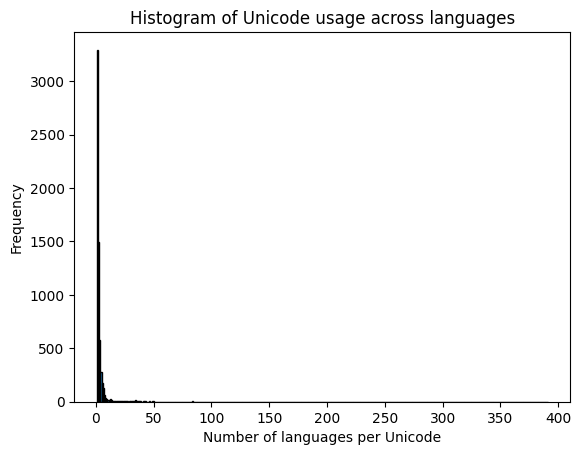

In [45]:
# Plot histogram
plt.hist(language_counts, bins=range(1, max(language_counts)+2), edgecolor='black')
plt.xlabel('Number of languages per Unicode')
plt.ylabel('Frequency')
plt.title('Histogram of Unicode usage across languages')
plt.show()

In [46]:
print(len(language_counts))

6462


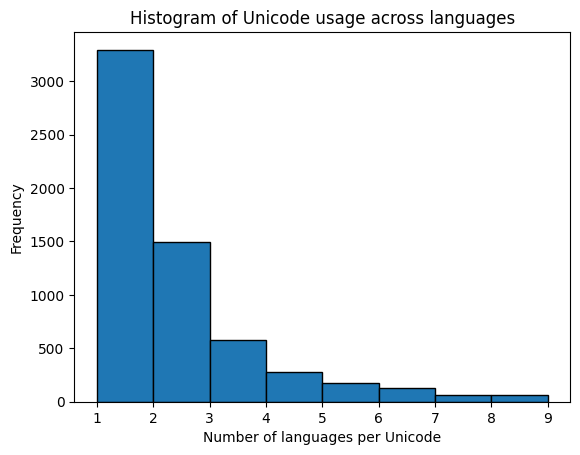

In [47]:
plt.hist(language_counts, bins=range(1, 10), edgecolor='black')
plt.xlabel('Number of languages per Unicode')
plt.ylabel('Frequency')
plt.title('Histogram of Unicode usage across languages')
plt.show()

lots of unicodes appear in only one language.

# Proper data processing

In [48]:
original_train_df = train_df

In [49]:
train_df, val_df, *_ = get_train_data(val_size=0.2, random_state=seed)

TypeError: get_train_data() got multiple values for argument 'removeNaNs'